In [7]:
from src.utils import FeatureEng
eng = FeatureEng('./dados')
eng.labels()

train = eng.Encoder(eng.train)
test = eng.Encoder(eng.test)


==========CODIFICANDO LABELS CATEGORICOS==========
==========TRATANDO DATA==========
==========TRATANDO DATA==========


In [8]:
train.head()

,Sex,Embarked,Cabin,Survived,Pclass,Age,SibSp,Parch,Fare,Title,label_sums,Ticket
0,1,2.0,NaN,0,3,22.0,1,0,7.2500,12,12.900,521171.0
1,0,0.0,5.0,1,1,38.0,1,0,71.2833,13,13.570,17599.0
2,0,2.0,NaN,1,3,26.0,0,0,7.9250,9,9.200,23101282.0
3,0,2.0,5.0,1,1,35.0,1,0,53.1000,13,13.120,113803.0
4,1,2.0,NaN,0,3,35.0,0,0,8.0500,12,12.101,373450.0


In [9]:
import numpy as np
X_miss_titanic = train.drop(columns=['Survived']).to_numpy()
Y_miss_titanic = train['Survived'].to_numpy()

X_titanic = train.dropna().drop(columns=['Survived']).to_numpy() #Full data not nan
Y_titanic = train.dropna()['Survived'].to_numpy()#Full data not nan

In [10]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from src.missing import get_impute_iterative,get_impute_KNN_score,get_impute_mean ,get_full_score,get_impute_zero_score
import numpy as np


regressor = RandomForestRegressor(random_state=0)
clf = KNNImputer(missing_values=np.nan, add_indicator=True)
N_SPLITS = 4
x_labels = []

mses_titanic = np.zeros(5)
stds_titanic = np.zeros(5)


mses_titanic[0], stds_titanic[0] = get_full_score(regressor,X_titanic, Y_titanic, N_SPLITS)
x_labels.append("Full data")
mses_titanic[1], stds_titanic[1] = get_impute_zero_score(regressor,X_miss_titanic, Y_miss_titanic, N_SPLITS)
x_labels.append("Zero imputation")
mses_titanic[2], stds_titanic[2] = get_impute_mean(regressor,X_miss_titanic, Y_miss_titanic, N_SPLITS)
x_labels.append("Mean Imputation")
mses_titanic[3], stds_titanic[3] = get_impute_KNN_score(regressor,X_miss_titanic, Y_miss_titanic, N_SPLITS)
x_labels.append("KNN Imputation")
mses_titanic[4], stds_titanic[4] = get_impute_iterative(regressor,X_miss_titanic, Y_miss_titanic, N_SPLITS)
x_labels.append("Iterative Imputation")

mses_titanic = mses_titanic * -1

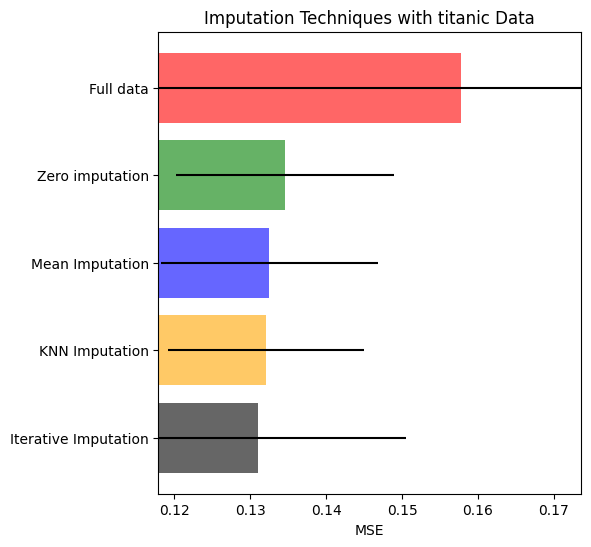

In [11]:

import matplotlib.pyplot as plt

n_bars = len(mses_titanic)
xval = np.arange(n_bars)

colors = ["r", "g", "b", "orange", "black"]

# plot diabetes results
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(
        j,
        mses_titanic[j],
        xerr=stds_titanic[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax1.set_title("Imputation Techniques with titanic Data")
ax1.set_xlim(left=np.min(mses_titanic) * 0.9, right=np.max(mses_titanic) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel("MSE")
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)

plt.show()

In [12]:

# Perceba que o interative Imputation tem o menor erro medio quadratico
# Assim, testaremos o interative Inputation para varios estimadores e estilos. 
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV, HuberRegressor, LassoLars, BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

RegressorList = [
        DecisionTreeClassifier(),
        BernoulliNB(),
        KNeighborsClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        ExtraTreesClassifier(),
        RandomForestClassifier(),
        LinearRegression(),
        LogisticRegression(),
        BayesianRidge(),
        SGDRegressor(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        KNeighborsRegressor(),
        HuberRegressor(),
        ElasticNet(),
        ElasticNetCV(),

        GradientBoostingRegressor(),
        AdaBoostRegressor(),
        ExtraTreesRegressor()
        ]

StyleList = ['ascending', 'descending', 'roman', 'arabic', 'random']

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from src.missing import get_scores_for_imputer

def get_iterative_estimatos(regressor,style,X_missing, y_missing,N_SPLITS):
    imputer = IterativeImputer(imputation_order=style,
                            missing_values= np.nan,
                            add_indicator= True,
                            n_nearest_features = 3,
                            max_iter= 100,
                            tol= 0.1,
                            sample_posterior = True
                            )
    iterative_impute_scores = get_scores_for_imputer(regressor,imputer, X_missing, y_missing,N_SPLITS)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()

x_labels = []

mses_titanic = np.zeros(100)
stds_titanic = np.zeros(100)

index = 0
for regressor in RegressorList:
    for style in StyleList:
        mses_titanic[index], stds_titanic[index] = get_iterative_estimatos(regressor,style,X_miss_titanic, Y_miss_titanic, N_SPLITS)
        x_labels.append(f"{regressor.__class__.__name__}:{style}")
        index += 1
mses_titanic = mses_titanic * -1


/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAM

In [13]:
import pandas as pd
xx = pd.DataFrame({'Labels' : x_labels, "MSE" : mses_titanic})
Choice = xx.min()
print(Choice)

Labels    AdaBoostClassifier:arabic
MSE                        0.130358
dtype: object


/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAM

Mean cross-validataion score: 0.79


/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAM

K-fold CV average score: 0.80
MSE: 0.18
RMSE: 0.42
Precision: 83.33333333333334


/home/luall/Documentos/Profisa/P&D/Projetos/primary/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


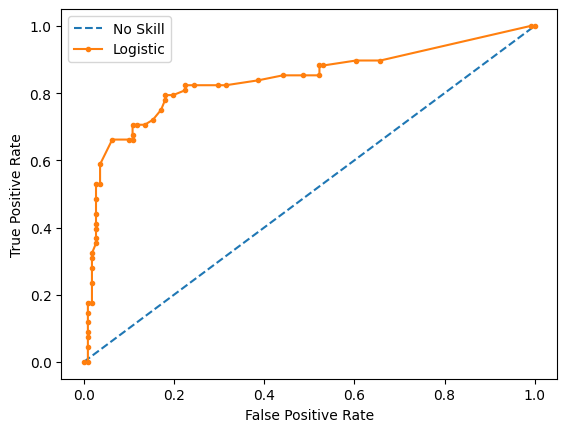

In [14]:

# Agora eu Substituo os valores faltantes com o estilo arabic e treino o modelo AdaBoostRegressor para prever quem sobreviveu ou nao

imputer = IterativeImputer(imputation_order='arabic',
                        missing_values= np.nan,
                        add_indicator= True,
                        n_nearest_features = 3,
                        max_iter= 100,
                        tol= 0.1,
                        sample_posterior = True
                        )
from sklearn.model_selection import cross_val_score, KFold, train_test_split

X = imputer.fit_transform(X_miss_titanic)

X_train, X_test, y_train, y_test = train_test_split(X, Y_miss_titanic, test_size=0.2)


clf = AdaBoostClassifier(n_estimators = 50,
                        learning_rate = 0.1)

clf.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error,precision_score,roc_curve
scores = cross_val_score(clf, X_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

#We can also apply cross-validation with a k-fold method.

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

#Next, we'll predict test data and check its accuracy. Here, we'll use MSE and RMSE accuracy metrics.

ypred = clf.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))
precision = precision_score(y_test, ypred, average='binary')
print(f"Precision: {precision*100}")
#Finally, we'll visualize the original and predicted test data in a plot.

yhat = clf.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [15]:
import pickle

# save the model
with open('model/titanic.pkl','wb') as f:
    pickle.dump(clf,f)


## Contato

**Nome:** Lucas Oliveira Alves  
**Email:** [alves_lucasoliveira@usp.br](mailto:alves_lucasoliveira@usp.br)  
**LinkedIn:** [linkedin.com/in/cyblx](https://www.linkedin.com/in/cyblx/)  
**GitHub:** [github.com/cyblx](https://github.com/cyblx)